## Lab 4 - Plotting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = sm.datasets
import seaborn as sns

## Download, clean, and merge data

In [17]:
# Download reported crime data from 2019

def get_data_chicago(id):
    '''
    Connect to the chicago data portal API and returns a dataframe
    '''
    
    url = f'https://data.cityofchicago.org/api/views/{id}/rows.csv?accessType=DOWNLOAD'
    df = pd.read_csv(url)

    
    return df

In [101]:
crimes2019 = get_data_chicago('w98m-zvie')
crimes2020 = get_data_chicago('qzdf-xmn8')

crimes = pd.concat([crimes2019, crimes2020])

crimes = crimes[['ID', 'Date', 'Primary Type', 'FBI Code', 
        'Arrest', 'Community Area', 'Year','Location']]

crimes.head()

,ID,Date,Primary Type,FBI Code,Arrest,Community Area,Year,Location
0,12202211,12/13/2019 08:00:00 AM,MOTOR VEHICLE THEFT,07,False,60,2019,NaN
1,11923716,12/16/2019 04:00:00 PM,CRIMINAL SEXUAL ASSAULT,02,True,75,2019,"(41.692432806, -87.674238284)"
2,11905010,11/22/2019 08:30:00 PM,OFFENSE INVOLVING CHILDREN,02,False,21,2019,"(41.935272806, -87.719592066)"
3,11756968,07/14/2019 12:27:00 AM,BATTERY,04B,False,8,2019,"(41.898725056, -87.641836105)"
4,12201956,06/15/2019 03:30:00 PM,OTHER OFFENSE,26,False,16,2019,NaN


In [ ]:
#Chicago community areas dataset
comm_areas = get_data_chicago('igwz-8jzy')

#select only relevant columns
comm_areas = comm_areas[['COMMUNITY', 'AREA_NUMBE']]

print(comm_areas.shape)
comm_areas.head()

In [69]:
#merge crime df and community areas df
merged = crimes.merge(comm_areas, left_on="Community Area", 
                      right_on="AREA_NUMBE", how="inner")
print(merged.shape)
merged.head()

(428382, 24)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,COMMUNITY,AREA_NUMBE
0,12202211,JD409555,12/13/2019 08:00:00 AM,032XX S HALSTED ST,0930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,False,False,...,07,NaN,NaN,2019,10/25/2020 03:52:01 PM,NaN,NaN,NaN,BRIDGEPORT,60
1,12201545,JD408228,05/17/2019 03:40:00 PM,008XX W 31st st,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,...,11,NaN,NaN,2019,10/24/2020 03:51:49 PM,NaN,NaN,NaN,BRIDGEPORT,60
2,11660525,JC230676,04/19/2019 06:17:00 PM,032XX S MORGAN ST,1310,CRIMINAL DAMAGE,TO PROPERTY,STREET,False,False,...,14,1170176.0,1883245.0,2019,09/28/2020 03:47:51 PM,41.835116,-87.651071,"(41.835116429, -87.651071215)",BRIDGEPORT,60
3,11853725,JC464040,10/07/2019 09:07:00 PM,032XX S MORGAN ST,041A,BATTERY,AGGRAVATED - HANDGUN,SIDEWALK,False,False,...,04B,1170173.0,1883368.0,2019,08/10/2020 03:50:37 PM,41.835454,-87.651079,"(41.835454018, -87.651078638)",BRIDGEPORT,60
4,12127352,JD322512,12/18/2019 08:00:00 AM,029XX S CANAL ST,0820,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,...,06,1173769.0,1885374.0,2019,08/09/2020 03:47:44 PM,41.840880,-87.637824,"(41.840879515, -87.637824245)",BRIDGEPORT,60


## Plotting in matplotlib

**fig, ax = plt.subplots()**
* fig - to change figure-level attributes or save the figure as an image file later
* ax or axes - specifying subplots - typically you can use ax.plot or axes[1].plot to make plots on each axis

**Parameters:**
* Number of subplots: fig, ax = plt.subplots(rows, cols)
* Figure size: fig, ax = plt.subplots(figsize=(width, height))

## Plotting crimes for one neighborhood

In [72]:
count_by_community = merged.groupby(['COMMUNITY','Primary Type']).size().to_frame('COUNT').reset_index()
count_by_community.head()

,COMMUNITY,Primary Type,COUNT
0,ALBANY PARK,ARSON,8
1,ALBANY PARK,ASSAULT,307
2,ALBANY PARK,BATTERY,672
3,ALBANY PARK,BURGLARY,171
4,ALBANY PARK,CONCEALED CARRY LICENSE VIOLATION,1


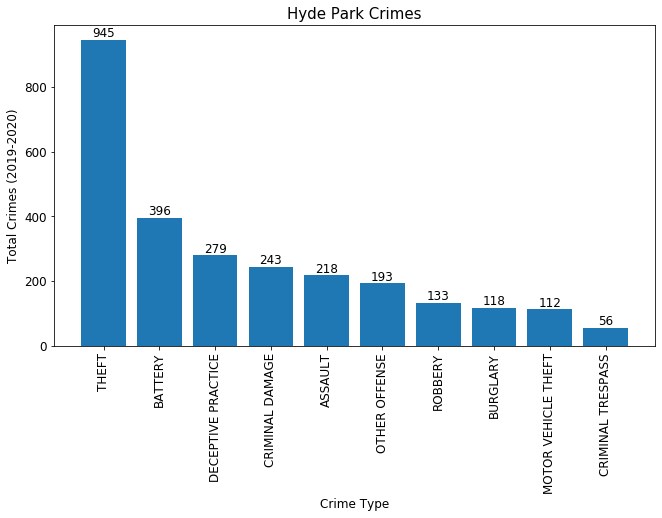

In [201]:
# creates bar graph labels
# Source: https://stackoverflow.com/questions/40287847/python-matplotlib-bar-chart-adding-bar-titles

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
fig, ax = plt.subplots(figsize=(10,8))
neighborhood = 'HYDE PARK'

df = count_by_community[count_by_community['COMMUNITY']==neighborhood]
df = df.sort_values('COUNT', ascending=False).head(10)
bars = ax.bar('Primary Type', 'COUNT', data=df)
ax.set_title('{} Crimes'.format(neighborhood.title()), fontsize=15)
ax.set_ylabel('Total Crimes (2019-2020)', fontsize=12);
ax.set_xlabel('Crime Type', fontsize=12);
ax.set_xticklabels(df['Primary Type'], rotation=90)
fig.tight_layout(pad=3.0)

# sets labels
autolabel(bars)

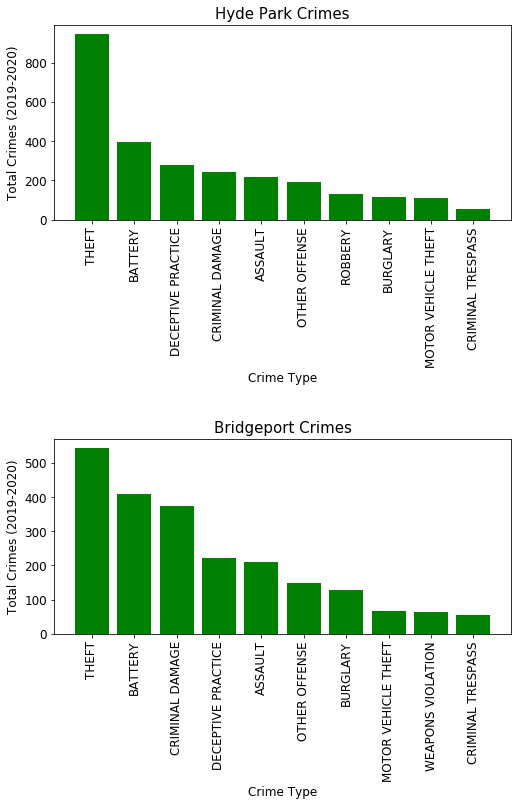

<Figure size 432x288 with 0 Axes>

In [203]:
# creating two subplots using a loop

fig, axes = plt.subplots(2, figsize=(8,12))
neighborhoods = ['HYDE PARK', 'BRIDGEPORT']

for i, neighborhood in enumerate(neighborhoods):
    df = count_by_community[count_by_community['COMMUNITY']==neighborhood]
    df = df.sort_values('COUNT', ascending=False).head(10)
    bars = axes[i].bar('Primary Type', 'COUNT', data=df, color='green')
    axes[i].set_title('{} Crimes'.format(neighborhood.title()), fontsize=15)
    axes[i].set_ylabel('Total Crimes (2019-2020)', fontsize=12);
    axes[i].set_xlabel('Crime Type', fontsize=12);
    axes[i].set_xticklabels(df['Primary Type'], rotation=90)
    fig.tight_layout(pad=3.0)
#     autolabel(bars)

plt.show()
plt.savefig('hyde_park_crimes.png')

## Plotting crimes across years

In [94]:
by_year = merged.groupby(['Primary Type', 'Year']).size().to_frame('COUNT').reset_index()
by_year['Year'] = by_year['Year'].astype(str)
by_year.head()

,Primary Type,Year,COUNT
0,ARSON,2019,375
1,ARSON,2020,460
2,ASSAULT,2019,20613
3,ASSAULT,2020,14999
4,BATTERY,2019,49494


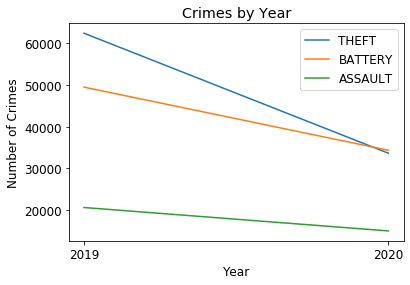

In [113]:
fig, ax = plt.subplots()

plt.rcParams.update({'font.size': 12}) # or you could update all the font sizes at once

crime_list = ['THEFT', 'BATTERY', 'ASSAULT']
for crime in crime_list:
    ax.plot('Year', 'COUNT', data=by_year[by_year['Primary Type']==crime], label=crime)

ax.set_title('Crimes by Year')
ax.set_ylabel('Number of Crimes');
ax.set_xlabel('Year')
ax.legend()

# Bokeh Example
https://realpython.com/python-data-visualization-bokeh/#from-data-to-visualization

In [109]:
import numpy as np

# Bokeh libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

# My word count data
day_num = np.linspace(1, 10, 10)
daily_words = [450, 628, 488, 210, 287, 791, 508, 639, 397, 943]
cumulative_words = np.cumsum(daily_words)

# Output the visualization directly in the notebook
output_notebook()

# Create a figure with a datetime type x-axis
fig = figure(title='My Tutorial Progress',
             plot_height=400, plot_width=700,
             x_axis_label='Day Number', y_axis_label='Words Written',
             x_minor_ticks=2, y_range=(0, 6000),
             toolbar_location=None)

# The daily words will be represented as vertical bars (columns)
fig.vbar(x=day_num, bottom=0, top=daily_words, 
         color='blue', width=0.75, 
         legend='Daily')

# The cumulative sum will be a trend line
fig.line(x=day_num, y=cumulative_words, 
         color='gray', line_width=1,
         legend='Cumulative')

# Put the legend in the upper left corner
fig.legend.location = 'top_left'

# Let's check it out
show(fig)


Loading BokehJS ...